# Text-Guided Generation of Images (Using CLIP and StyleGAN)

In [ ]:
!git clone https://github.com/sindhura-cs/CLIPGuidedGANS_CS5824.git
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

In [7]:
import os
os.chdir(f'./CLIPGuidedGANS_CS5824/StyleCLIP')

In [12]:
import shutil
from pathlib import Path

try:
    from google.colab import drive

    drive.mount("/content/gdrive/")
    drive_path = "/content/gdrive/My Drive/"
    path_to_weights = "AML/fashion_IQ_weights/013500.pt" #@param
    sys_path = Path(drive_path + path_to_weights)
    shutil.copyfile(sys_path , Path("/content/CLIPGuidedGANS_CS5824/StyleCLIP/gan_weights.pt"))
except ModuleNotFoundError:
    pass

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [13]:
description = 'black shirt with round collar' #@param {type:"string"}

optimization_steps = 100 #@param {type:"number"}

stylespace = True #@param {type:"boolean"}

use_seed = True #@param {type:"boolean"}

seed = 1 #@param {type: "number"}


In [18]:
#@title Additional Arguments
args = {
    "description": description,
    "ckpt": "gan_weights.pt",
    "stylegan_size": 256,
    "lr": 0.1,
    "step": optimization_steps,
    'work_in_stylespace': stylespace,
    "save_intermediate_image_every": 20,
    "results_dir": "results",
}

In [19]:
if use_seed:
  import torch
  torch.manual_seed(seed)
from run_optimization import main
from argparse import Namespace
result = main(Namespace(**args))

100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 45.7MiB/s]
loss: 0.5674;: 100%|██████████| 100/100 [00:14<00:00,  7.12it/s]


black shirt with round collar


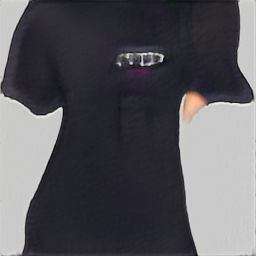

In [20]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size

print(description)
result_image